# MLDM Lab week 4: Comparing different algorithms using cross-validation, Bayesian Learning and Text Classification

<h3> <font color="blue"> Introduction </h3>

In this lab session, we learn how to evaluate and compare different learning algorithms using cross-validation. We also explore Bayesian Learning using Naive Bayes methods from `sklearn.naive_bayes` library. 
    
We revisit the Iris and the Breast Cancer datasets from previous lab sessions and train Bayesian classifiers and compare the results with other classifiers (i.e. decision tree, Perceptron and MLP) on these datasets. Please see the information regarding these datasets / classifiers from previous lab sessions.
    
We also explore Bayesian classifiers for a text classification problem, i.e. spam filtering.

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Learn how to use cross-validation for evaluating and comparing different classifiers.</p>
<p> 2.  Learn how to train Bayesian classifiers using `sklearn.naive_bayes` library. </p>
<p> 3.  Learn how to use Bayesian classifiers for spam-filtering. </p>

## <font color="blue"> Training a Bayesian classifier and comparing the performance using cross-validation
In this section we re-visit the Iris and breast cancer datasets, train Bayesian classifiers for these datasets and compare the performance with decision tree, perceptron and MLP. 
    
We use GaussianNB (Gaussian Naive Bayes) classifier from `sklearn.naive_bayes` library. More information can be found <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">here</a>.
        
We evelauate different algorithms on a test data, however, instead of using one training set and one test set, we use 10-fold cross-validation, i.e. we will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

This approach provides a more accurate estimation for the accuracy of the classifiers. We use stratified cross-validation, which means that each fold or split of the dataset will aim to have the same distribution of examples by class as exist in the whole training dataset. We use cross_val_score from sklearn.model_selection library.

We can create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation). A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

Naive Bayes: 0.939037 (0.033207)
Decision Tree: 0.917829 (0.033428)
Perceptron: 0.913068 (0.052829)


C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_mo

MLP: 0.899169 (0.031162)


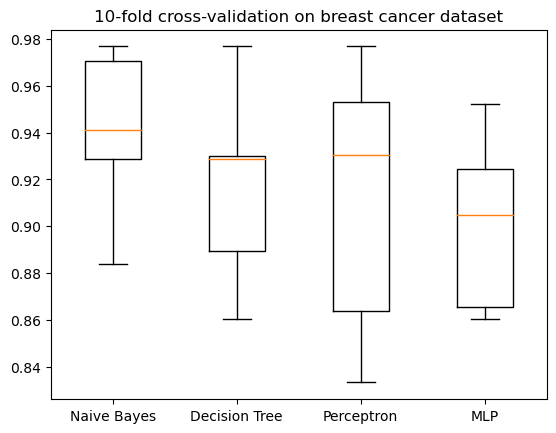

In [16]:
# Compare algorithms using cross-validation

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

import pandas as pd
breast_cancer = pd.read_csv('breast_cancer_data.csv')

# Features "id" and "Unnamed: 32" should be removed
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# the target feature, i.e. diagnosis class
y = breast_cancer.diagnosis

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0)
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=10)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None)  # random_state update to none instead of 1
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()

<h3><font color="red">Exercise 1 </font> </h3>
<p>Using the results of the cross-validation tests above, compare the performance of different classifiers in terms of accuracy. Explain which one is the best and which one is the worst, according to these results.</p>

<p>Use the markdown cell below to write your answer for Exercise 1</p>

# Answer to Exercise 1

In order to run the code I updated the random_state=None

As the output of the model the mean acccuracies of the folds and standard deviations are observed. In terms of accuracy among the four models.
The Naive Bayes model performed the best with 93.9% with low standard deviation. This shows that the model was the best one 
to predict the cancer diagnosis with stable standard deviation score.
Decision Tree is the second best model in order to predict the diagnosis with 91.7% with the almost the lowest standard deviation which shows that amongs the folds the model was stable even though the prediction accuracy score. The values are really close to Naive Bayes model's predictions.
MLP achieved the accuracy of 89.9% which is the lowest, which is  close to the Decision Tree model but on the other hand the standard deviation is the lowest. The standard deviation of the model is closer to the Naive Bayes model. MLP's accuracy is not as high as the Naive Bayes and Decision Tree, the standard deviation not as low as Decision Tree.
Perceptron has also a close accuracy to top two models, 91.3% which makes it the second best model on the accuracy point of view  and highest standard deviation amongs the all. High standard deviation shows that amongs the folds the model's performance was not stable it varied. Even though the accuracy score is good, high standard deviation made the model unstable. 

The Naive Bayes model performed best with the highest mean accuracy score and overally good standard deviation. On the other hand MLP performed the worst with the lowest accuracy and for highest standard deviation it is Perceptron. Meanwhile, The Naive Bayes nad Decision Tree performed really good. 


 <h3><font color="red">Exercise 2 </font> </h3>
<p>Repeat the experiment above with `max_iter` for perceptron reduced from 100 to 10 and compare the performances. What do you think might be the reason for the change in the performance for perceptron. </p>

<p>Use the code/markdown cells below to write your code/answer for Exercise 2</p>

# Answer to Exercise 2
max_iter = 100 Perceptron's accuracy and std: 0.879845 (0.112492)
max_iter = 10 Perceptron's accuracy and std: 0.882614 (0.056395)

It is seen that with the lower value for the max_iter the Perceptron's accuracy slightly rised and showed the performance slightly improved. but the standard deviation dramatically lowered which shows that the model's consistency got better.
Reducing the iterations did not create a big impact on the accuracy but made the model perform more stable with different folds. On a general comparison the model is still not good enough on the comparison with other models.

Answer to Exercise 2



<h3><font color="red">Exercise 3 </font> </h3>
<p>Repeat the experiment above and compare the performance of Naive Bayes with different classifiers (in terms of accuracy) on the Iris dataset.</p>

<p>Use the code and markdown cells below to write your code / answer for Exercise 3.</p>

Naive Bayes: Accuracy: 0.9379, Standard Deviation: 0.0686
Decision Tree: Accuracy: 0.9636, Standard Deviation: 0.0603
Perceptron: Accuracy: 0.7682, Standard Deviation: 0.1671
MLP_10: Accuracy: 0.3303, Standard Deviation: 0.0394


C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\linear_mo

MLP_100: Accuracy: 0.6970, Standard Deviation: 0.0383


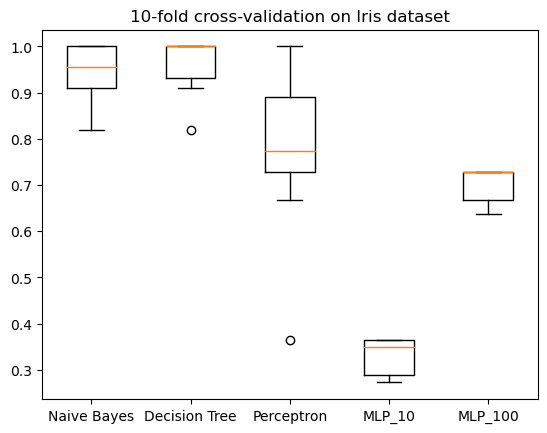

In [18]:
# Answer to Exercise 3
# import libraries
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# defining train test split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=0)

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=10)))
models.append(('MLP_10', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=10)))
models.append(('MLP_100', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None) # random_state update to none instead of 1
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: Accuracy: %.4f, Standard Deviation: %.4f' % (name, cv_results.mean(), cv_results.std()))

plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on Iris dataset')
plt.show()



Answer to Exercise 3

In order to run the code the random_State updated as none in the kfold. 

The Decision tree classifier has the highest accuracy of 96.3% with standard deviation of 0.0603. Followed by the Naive Bayes model with 93.7% correct predict accuracy and 0.0686 score of standard deviation. Perceptron has the 76.8% accuracy with 0.1671 standard deviation. Meanwhile not related with the max_iter number MLP models performed the worst amongs the other three model types. On the other hand when the max_iter=10 the model's accuracy drops to 33% which shows that the predictions are meaningless and with the highest standard deviation score it also shows that the model's stability is not great according to different folds. With max_iter=100 the MLP's accuracy is 69.7% with 0.0383 standard deviation. The model's accuracy is arguably bad and close to the random(base) model(accuracy: 50%) but still performs better than the MLP with max_iter=10.
The Decision Tree and Naive Bayes classifiers outformed the other models with the highest accuracy and relatively small standard deviation. From the accuracy and standard deviation perspective it is also seen that with the similar model structure the model's performance could be based on the dataset.


## <font color="blue"> Text classification using Bayesian classifiers - Spam Filtering
In this section we train Bayesian classifiers for the task of spam filtering, i.e. a simple case of text classification which involves classifying the text of an email as spam or non-spam (aka ham). 

### The dataset from Ling-spam corpus
We use a subset of a publicly available email corpus called Ling-spam corpus. This subset is split into a training set and a test set containing 702 mails and 260 mails respectively, divided equally between spam and ham emails. Please download (and unzip) the Ling_spam_data.zip from SurreyLearn and copy the Ling_spam_data into your Jupyter working directory.

### Preparing the text data and the dictionary
The emails in Ling-spam corpus have been already pre-processed in the following ways: a) removal of stop words (e.g. “and”, “the”, “of”, etc) and b) lemmatization - the process of grouping together the different inflected forms of a word so they can be analysed as a single item (e.g. “include” instead of “includes”, “included” etc ). As a first step, we need to create a dictionary of words and their frequency. The python function below creates a dictionary, i.e. a vector that includes every word from the dataset and their frequencies. 

In [1]:
import numpy as np
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
import os
import numpy as np
import collections
import pickle
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
DICT_SIZE = 500

In [31]:
def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

In [3]:
def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

### Feature extraction

Suppose that we have 500 (DICT_SIZE) words in our dictionary. Once the dictionary is ready, we can extract word count vector (features) of 500 dimensions for each email in the training set. Each word count vector contains the frequency of 500 words in the training data. Suppose text in training file was “Get the work done, work done” then it will be encoded as [0,0,0,0,0,…….0,0,2,0,0,0,……,0,0,1,0,0,…0,0,1,0,0,……2,0,0,0,0,0]. Here, all the word counts are placed at 296th, 359th, 415th, 495th index of 500 length word count vector and the rest are zero. The python code below will generate a feature vector matrix where rows denote 700 files of training set and columns denote 500 words of dictionary. The value at index ‘ij’ will be the number of occurrences of jth word of dictionary in ith file.


In [4]:
def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

In [5]:
all_words = get_dictionary('Ling_spam_data')
dictionary = make_dictionary(all_words)

spam = get_features('./Ling_spam_data/spam',dictionary)
ham = get_features('./Ling_spam_data/ham',dictionary)

dict_keys(['lectureship', 'linguistic', 's', 'c', 'h', 'o', 'l', 'f', 'e', 'n', 'g', 'd', 'u', 't', 'v', 'r', 'y', 'm', 'lecturer', 'generative', 'linguistics', 'successful', 'candidate', 'must', 'complete', 'process', 'doctorate', 'able', 'demonstrate', 'strong', 'research', 'focus', 'historical', 'phonology', 'syntax', 'romance', 'vium', 'dissertation', 'publish', 'work', 'area', 'ability', 'teach', 'sociolinguistic', 'advantage', 'post', 'tenable', 'october', 'salary', 'within', 'range', 'pound', 'per', 'annum', 'grade', 'scale', 'accord', 'experience', 'further', 'detail', 'obtain', 'personnel', 'officer', 'old', 'shire', 'hall', 'university', 'durham', 'dh', 'hp', 'unite', 'kingdom', 'tel', 'fax', 'whom', 'application', 'send', 'later', 'please', 'quote', 'reference', 'a', 'negative', 'concord', 'interest', 'grammar', 'various', 'dialect', 'american', 'british', 'english', 'anyone', 'speak', 'natively', 'answer', 'grammaticality', 'question', 'email', 'note', 'effect', 'll', 'back

In [22]:
filename = 'spam.save'
pickle.dump(spam, open(filename, 'wb'))
filename = 'ham.save'
pickle.dump(ham, open(filename, 'wb'))

In [23]:
spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

### Training and cross-validation
Bayesian classifiers are used below to learn from features space between the two classes, i.e spam and non-spam (ham).

In [24]:
X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

In [25]:
models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

MultinomialNB: 0.975000 (0.023895)
GaussianNB: 0.929167 (0.032543)
BernoulliNB: 0.868056 (0.036878)


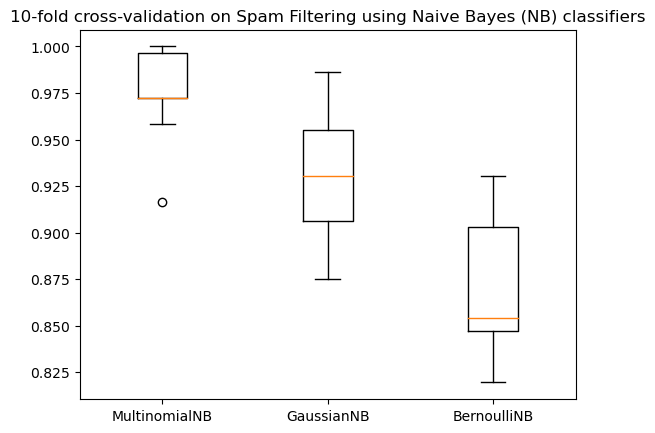

In [26]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None) # updated random_state from 1 to none
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

<h3><font color="red">Exercise 4 </font> </h3>
<p> What is the effect of increasing/decreasing the size of dictionary (DICT_SIZE) on accuracy? Try to improve the accuracies by changing the value for DICT_SIZE. Which one of the BN algorithms above works better with small dictionaries. </p>
<p>Use the code and markdown cells below to write your code / answer for Exercise 4.</p>

The DICT_SIZE parameter is the parameter to determines the total number of the words in the dictionary. Increase and decrease operations will have an impact on the model since the model's batch size and frequencies will change. 

For the initial code the output shows that Multinomial Classifier has the highest accuracy score, 97.5% with the lowest standard deviation, 0.023 which makes it the best classifier amongs the other models. It is followed by the GaussianNB with 92.9% accuracy and 0.032 standard deviation. Lastly BernoulliNB came the last with it's model performanve which is still considerably good, 86.8% accuracy and 0.036 standard deviation score.


MultinomialNB: 0.975000 (0.023895)
GaussianNB: 0.929167 (0.032543)
BernoulliNB: 0.868056 (0.036878)


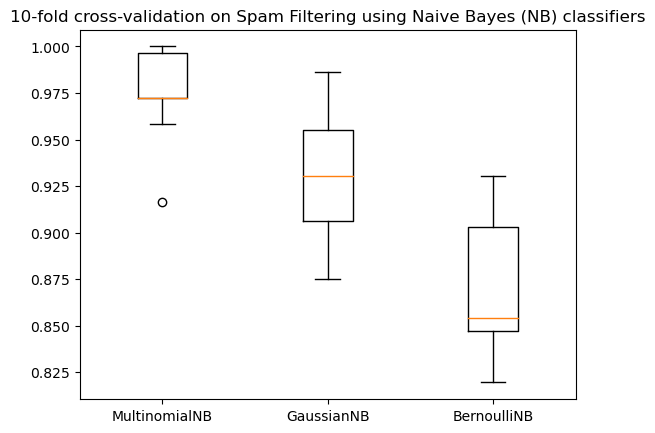

In [41]:
DICT_SIZE = 10

def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None) # updated random_state from 1 to none
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

MultinomialNB: 0.975000 (0.023895)
GaussianNB: 0.929167 (0.032543)
BernoulliNB: 0.868056 (0.036878)


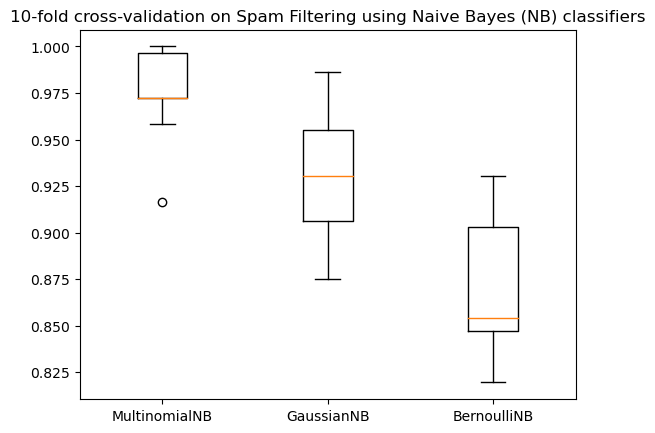

In [30]:
DICT_SIZE = 250

def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None) # updated random_state from 1 to none
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

MultinomialNB: 0.975000 (0.023895)
GaussianNB: 0.929167 (0.032543)
BernoulliNB: 0.868056 (0.036878)


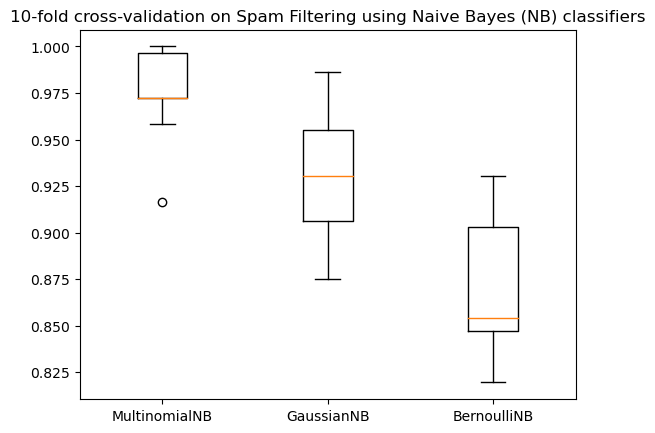

In [32]:
DICT_SIZE = 750

def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None) # updated random_state from 1 to none
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

MultinomialNB: 0.975000 (0.023895)
GaussianNB: 0.929167 (0.032543)
BernoulliNB: 0.868056 (0.036878)


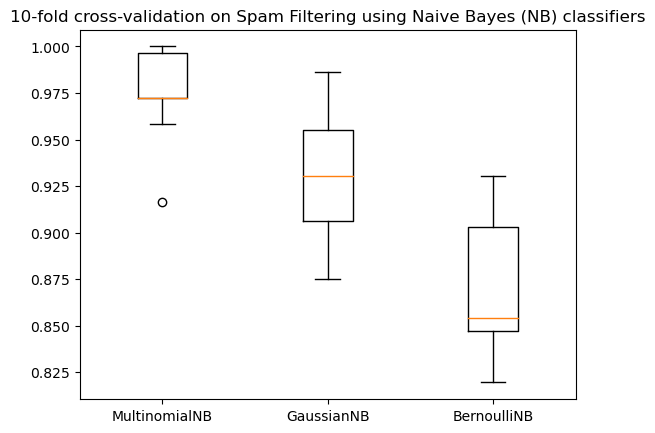

In [33]:
DICT_SIZE = 1000

def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1

X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

models = []
models.append(('MultinomialNB', MultinomialNB()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None) # updated random_state from 1 to none
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

For 
DICT_SIZE = 10 MultinomialNB: 0.975000 (0.023895) GaussianNB: 0.929167 (0.032543) BernoulliNB: 0.868056 (0.036878)
DICT_SIZE = 250 MultinomialNB: 0.975000 (0.023895) GaussianNB: 0.929167 (0.032543) BernoulliNB: 0.868056 (0.036878)
DICT_SIZE = 750 MultinomialNB: 0.975000 (0.023895) GaussianNB: 0.929167 (0.032543) BernoulliNB: 0.868056 (0.036878)
DICT_SIZE = 1000 MultinomialNB: 0.975000 (0.023895) GaussianNB: 0.929167 (0.032543) BernoulliNB: 0.868056 (0.036878)

It is seen that icnreasing or decreasing the DICT_SIZE parameter does not have any  on accuracy. The models have performed same and classified the spam/ham unrelated to the various value of parameter. The accuracy improvement did not happened with different DICT_SIZE values.
With the highest accuracy score and lowest standard devaiation the MultinominalNB has the best performance amongs the other for this dictionary problem even though MultinominalNB has noise that can be observed from the box-plot graphic. 

<h3><font color="red">Save your notebook after completing the exercises and submit it to SurreyLearn (Assessments -> Assignments -> Lab Exercises - Week 4) as a python notebook file in ipynb formt. </h3>
<h3><font color="red">Deadline: 4:00pm Thursday 7 Mar  </h3> 
    